In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</i>''')

# Evolution of EROIs Until 2050

## _by Adrien Fabre_

I'll examine one key aspect of the sustainability of a 100% renewable energy mix: its technical possibility. It may sounds ridiculous, but the fact that renewable technologies deliver more energy than they consume has never been checked properly. First, I'll explain you the problem that could arise; second, I'll go into the data to see if we're screwed or not.

_I do not cite references in the text, but provide them at the end. The [publication](https://www.sciencedirect.com/science/article/pii/S0921800918320718) and its [presentation](https://drive.google.com/open?id=1NaHAZZbjRtzTKs7V0HWrNVXppZLtz9-N) are on-line._

## I. The EROI of a Technology Is Not Intrinsic

_I try to be pedagogical here, for people not familiar with Input-Output analysis. If this is still too complicated to understand, you can read only the bold contents of part I, and jump to the results in part II._

### I.1. A Simple Model With A Unique Energy Technology

The coefficient $a_{i,j}$ of technology matrix A represents the quantity of input $i$ required to produce one unit of output $j$.

$$\overset{A=\left(a_{\text{in, out}}\right)=\begin{pmatrix}a_{1,1} & \cdots & a_{1,n}\\
\vdots & \ddots & \vdots\\
a_{n,1} & \ldots & a_{n,n}
\end{pmatrix}\leftarrow\text{ inputs}}{\underset{\text{outputs}}{\downarrow}}$$

Below is an illustrative technology matrix with three inputs (and the same three outputs): an energy technology, materials, and energy. Let $m_e$ be the quantity of materials required to produce one unit of energy.

$$A=\begin{pmatrix}0 & 0 & 1\\
m_{e} & m_{m} & 0\\
E_{e} & E_{m} & 0
\end{pmatrix}\begin{array}{c}
\text{energy technology}\\
\text{materials}\\
\text{energy}
\end{array}$$

One can check that $m_e$ corresponds to the definition above, and one can find the meaning of other coefficients (_hint: the 1 on the top-right corner means that one unit of energy technology is required to produce one unit of energy_).

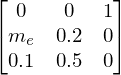

In [2]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 'last' 'none' ...
import sympy as sym
from pylab import *
sym.init_printing()
import matplotlib.pyplot as plt

m_e, e_e, m_m, e_m = sym.symbols('m_e e_e m_m e_m') # i_j: units of i required for 1 unit of j
unit_energy_output = sym.Matrix([0, 0, 1])
unit_tech_output = sym.Matrix([1, 0, 0])
# A = sym.Matrix([[0, 0, 1], [m_e, m_m, 0], [e_e, e_m, 0]]) # energy technology, material, energy
A = sym.Matrix([[0, 0, 1], [m_e, 0.2, 0], [0.1, 0.5, 0]]) # energy technology, material, energy
A

Now, we can compute the system-wide EROI of the economy represented by the technology matrix above.

The system-wide **EROI, or Energy Returned On Invested, is the ratio between the energy delivered by the system, and the energy required to build, operate, maintain and dismantle it.** In other words, it is the inverse of the amount of energy required to produce one unit of energy, when the series of all embodied inputs are taken into account.

In [45]:
HTML('''After some algebra (<a href="javascript:code_toggle()">toggle code</a> below to see it), we find the formula for the EROI:''')

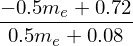

In [22]:
L = sym.eye(3)-A
Linv = L.inv()
EROI = sym.simplify(1/unit_energy_output.transpose().dot((Linv-sym.eye(3)).dot(unit_energy_output)))
EROI

Unsurprisingly, one can see in the Figure below that the EROI decreases with the material intensity of the energy technology, because extracting and processing material requires energy.

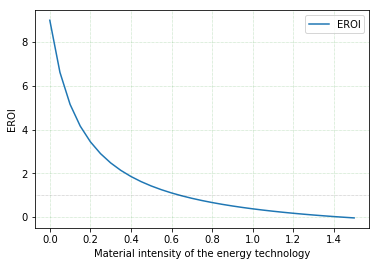

In [23]:
x = np.array(range(31))/20
fig, ax = subplots()

ax.plot(x, [EROI.subs(m_e, M) for M in x], label="EROI")
ax.set_xlabel('Material intensity of the energy technology')
ax.set_ylabel('EROI')
# ax.set_title('EROIs for different energy mixes')
ax.legend(loc=1)
ax.grid(color='g', alpha=0.5, linestyle='dotted', linewidth=0.5)
ax.axhline(y=1, color='black', alpha=0.5, linestyle='dotted', linewidth=0.5)
fig.savefig('EROIs for different material intensity 2.png', dpi=200, bbox_inches="tight")

For an intensity above 0.6, it is below 1. **An EROI below 1 means that the energy technology is not worth developing, because it consumes energy rather than providing it. Such a system is not sustainable** (and not realistic): for it to happen the society should have accumulated energy in the past from an energy source no more accessible, and would waste this energy in that absurd technology.

For even higher intensities, the EROI falls below 0, which means that the energy (recursively) required to produce one unit of energy is infinite. Here, free energy coming from the past wouldn't suffice to build the energy technology: one would also need to have free materials (i.e. materials requiring no energy to access them). No need to say that such a world is physically impossible.

### I.2. A Simple Model With A Mix of Two Technologies

Now, let us consider two energy technologies, with the same energy intensity, but different materials intensities.

Even if this example is purely illustrative, let us call them PV (for solar photovoltaic) and gas (for gas power-plant electricity). The numbers are completely made up, but they respect the fact that PV is more material intensive than gas. Here is our new technology matrix, where inputs (and outputs) are (in that order): PV, gas, materials, energy.

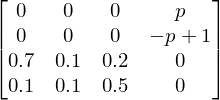

In [24]:
p = sym.symbols('p') # proportion of PV in energy mix
# m_pv (resp. m_oil) units of materials required for 1 kWh from PV (resp. oil)
m_pv, m_oil = 0.7, 0.1 # 
m_pv, m_oil, m_e, e_pv, e_oil, e_e = sym.symbols('m_pv m_oil m_e e_pv e_oil e_e') 
unit_energy_output = sym.Matrix([0, 0, 0, 1])
energy_mix = [p, 1-p] # proportion of [PV, oil]
A = sym.Matrix([[0, 0, 0, p], [0, 0, 0, 1-p], [0.7, 0.1, 0.2, 0], [0.1, 0.1, 0.5, 0]]) # order of ligns/columns: PV, oil, materials, energy
# A = sym.Matrix([[0, 0, 0, pv], [0, 0, 0, 1-pv], [m_pv, m_oil, m_e, 0], [e_pv, e_oil, e_e, 0]]) # order of ligns/columns: PV, oil, materials, energy
A

As you might have guessed, _p_ represents the share of PV in the energy (or electricity) mix.

Using simple algebra, one obtains the formula for the EROI:

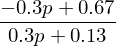

In [25]:
L = sym.eye(4)-A # sym.Matrix(3,3,[1, -m, -1, 0, 0.8, -1, -e, 0, 1])
Linv = L.inv()
EROI2 = sym.simplify(1/unit_energy_output.transpose().dot((Linv-sym.eye(4)).dot(unit_energy_output)))
EROI2

This corresponds to the system-wide EROI. But now that we have two technologies, we can compute the EROI of each of them.

The EROI of a technology is the ratio between the energy delivered by one unit of this technology (over its lifetime), and the energy required to build, operate, maintain and dismantle it.

In our example, the EROIs of PV and gas are, in that order:

In [26]:
EROIpv = sym.simplify(1/unit_energy_output.transpose().dot((Linv-sym.eye(4)).dot(sym.Matrix([1, 0, 0, 0]))))
EROIoil = sym.simplify(1/unit_energy_output.transpose().dot((Linv-sym.eye(4)).dot(sym.Matrix([0, 1, 0, 0]))))

EROIpv
EROIoil

Notice that they depend on the energy mix: **the EROI of a technology is not an intrinsic property**.

Indeed, **it depends on the whole economic system**, or more precisely, of all technologies used in their value chain. (The value chain what I called above the recursive or embodied inputs; its analysis is known as _structural path analysis_ in the literature).

Here, **the higher the share of PV in the mix, the lower the EROI of both technologies**: this comes from the higher material intensity of PV.

Put graphically:

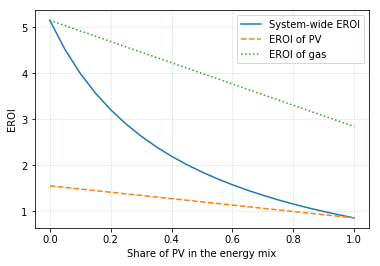

In [27]:
x = np.array(range(21))/20
fig, ax = subplots()

ax.plot(x, [EROI2.subs(p, PV) for PV in x], label="System-wide EROI")
ax.plot(x, [EROIpv.subs(p, PV) for PV in x], label="EROI of PV", linestyle='dashed') # , linestyle='dashed'
ax.plot(x, [EROIoil.subs(p, PV) for PV in x], label="EROI of gas", linestyle='dotted') # , linestyle='dotted'
ax.set_xlabel('Share of PV in the energy mix')
ax.set_ylabel('EROI')
# ax.set_title('EROIs for different energy mixes')
ax.legend(loc=1)
ax.grid(color='g', alpha=0.5, linestyle='dotted', linewidth=0.5)
fig.savefig('EROIs for different energy mixes - gas 2.png', dpi=200, bbox_inches="tight")

One can see that for highest penetration of PV, the EROI falls below unity. In other words, a renewable energy mix with 100% PV is not sustainable in this example. 

Even more worrying, if one computes the EROI of PV in an energy mix relying mostly on gas, one would find a high-enough EROI for PV (meaning, above 1).

Hence, one cannot conclude that a technology is sufficiently efficient (or sustainable) just by computing its EROI in the current energy mix.

Yet, EROIs computations are _always_ done from actual data of our economy, and could falsely represent the efficiencies of energy technologies in another energy mix, say, a 100% renewable one.

In the next sections, I'll go into the data and compute for the first time EROIs of different electricity technologies under an energy transition towards renewables.

Let's hope that we'll find EROIs above one for at least one renewable technology!

## II. Estimation of Current and Future EROIs

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
# One needs to install my fork of pymrio, available at https://github.com/bixiou/pymrio
#   To do this, clone my repository from github, go on the console on the pymrio folder, and
#   type 'python3 setup.py sdist', then 'python3 setup.py install'
import pymrio
from pymrio.core.mriosystem import IOSystem as IOS
from pymrio.tools.iomath import div0
from pymrio.tools.iofunctions import *
import pandas as pd
import numpy as np
# import scipy.io
import scipy.sparse as sp 
from scipy.sparse import linalg as spla
import operator
import warnings
import matplotlib.pyplot as plt
from pylab import *
import pickle
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # 'last' 'none' ...
warnings.filterwarnings('ignore')

In [2]:
%%capture
# Unfortunately, the database THEMIS is not open (you can ask to NTNU or thomas.gibon@list.lu) if they can provide it to you
path_themis = '/media/adrien/dd/adrien/DD/Économie/Données/Themis/'
path_io = '/media/adrien/dd/adrien/DD/Économie/Données/'
# path_io = '/media/sf_U_DRIVE/Données/'
years = [2010, 2030, 2050]
scenarios = ['BL', 'BM']
scenarios_dlr = ['REF', 'ER', 'ADV'] 
# themis = pymrio.themis_parser(path_themis)
themis = pickle.load(open(path_io+'Themis/themis.pkl', 'rb'))
# themis, EROIs_mixes, dlr, EROIs_Mixes = pickle.load(open(path_io+'Themis/EROIs.pkl', 'rb'))
# EROIs_mixes, dlr, EROIs_Mixes = pickle.load(open(path_io+'Themis/EROIs.pkl', 'rb'))

To compute EROIs, I use input-output tables (i.e. technology matrices) representing the global economy. 

The original database is [Exiobase](https://www.exiobase.eu/), and the model I used is [THEMIS](https://sci-hub.tw/https%3A//pubs.acs.org/doi/abs/10.1021/acs.est.5b01558), which is precisely what we need: input-output tables (IOT) of 2010, and prospective IOT for 2030 and 2050, under two [scenarios](http://gen.lib.rus.ec/book/index.php?md5=4D5AF94A02A48B799CF77641509C1C6B) of the International Energy Agency: BaseLine (with a high share of fossils) and Blue Map (with a high share of renewables).

I won't give much more details, let's go straight to the results. Let's see current EROIs first:

In [3]:
print('EROIs of electric technos in 2010:')
results(themis, scenarios='BL', year=2010, stats=['eroi', 'mix'])

EROIs of electric technos in 2010:


scenario         BL       
year           2010       
stat           EROI    mix
biomass w CCS     –   0.00
biomass&Waste  11.4   0.01
ocean           5.5   0.00
geothermal      5.4   0.00
solar CSP      21.6   0.00
solar PV        9.3   0.00
wind offshore   9.4   0.00
wind onshore    9.5   0.01
hydro          13.2   0.16
nuclear        10.5   0.14
gas w CCS         –   0.00
coal w CCS        –   0.00
oil             8.4   0.06
gas            13.9   0.21
coal           12.9   0.42
Total (PWh/a)  12.2  19.76

One can notice that PV and wind panels have a lower EROI than electricity from fossil fuels. 

The system-wide EROI for all electricity is given at the bottom line: it is 12.1.
    
Some EROIs are missing, because in 2010, the technology didn't exist yet on an industrial scale.

Now, let's see how EROIs would evolve in the energy transition.

In [7]:
print('EROIs of electric technos in 2050 in the Blue Map scenario (with mostly renewables):')
results(themis, scenarios='BM', year=2050, stats=['eroi', 'mix'])

EROIs of electric technos in 2050 in the Blue Map scenario (with mostly renewables):


scenario         BM       
year           2050       
stat           EROI    mix
biomass w CCS   4.0   0.01
biomass&Waste   5.2   0.05
ocean           5.8   0.00
geothermal      5.4   0.02
solar CSP       7.9   0.06
solar PV        6.0   0.06
wind offshore   6.2   0.04
wind onshore    7.3   0.08
hydro          13.1   0.14
nuclear         7.4   0.24
gas w CCS       9.1   0.05
coal w CCS      7.1   0.12
oil             7.3   0.01
gas            19.6   0.11
coal           12.4   0.01
Total (PWh/a)   8.0  40.22

The EROIs that matters (those of renewable) decrease, as anticipated in the previous section.

The result that global EROI decreases until 8 cast doubts on the energetic efficiency of renewable electricity. However, the EROI of each technology is expected to remain well above 1, which suggest that renewables are truly sustainable.

Phew! We can be reassured!

Uh, wait a minute! Look at this electricity mix in the Blue Map scenario: there is only 24% of solar and wind, and there remains 30% of fossils. Sure, more than half of includes Carbon Capture and Storage (CCS), but we are still far from a 100% renewable energy mix. Would these optimistic results hold in a more ambitious scenario?

Let's have a look at the Greenpeace's [Energy [R]evolution](https://www.greenpeace.org/archive-international/Global/international/publications/climate/2015/Energy-Revolution-2015-Full.pdf) scenario, which proposes a 100% energy mix as soon as 2050, without CCS nor nuclear. I'll skip the details once again, but I have changed the electricity mix of THEMIS' BM 2050 to incorporate this scenario. Here are the results:

In [4]:
results(themis, longnames=True)

scenario      Baseline ('BL')                                   \
year                     2010         2030         2050          
stat                     EROI    mix  EROI    mix  EROI    mix   
biomass w CCS               –   0.00     –   0.00     –   0.00   
biomass&Waste            11.4   0.01   6.3   0.02   5.9   0.03   
ocean                     5.5   0.00   2.4   0.00   2.9   0.00   
geothermal                5.4   0.00   5.2   0.01   5.1   0.01   
solar CSP                21.6   0.00   8.9   0.00   9.1   0.01   
solar PV                  9.3   0.00   7.4   0.01   7.2   0.01   
wind offshore             9.4   0.00  11.0   0.01  10.5   0.01   
wind onshore              9.5   0.01   9.3   0.04   8.1   0.04   
hydro                    13.2   0.16  11.9   0.14  11.9   0.12   
nuclear                  10.5   0.14   7.3   0.11   7.0   0.10   
gas w CCS                   –   0.00     –   0.00   7.5   0.00   
coal w CCS                  –   0.00     –   0.00   6.2   0.00   
oil                       8.4   0.06   9.8   0.02   9.9   0.01   
gas                      13.9   0.21  15.0   0.21  14.9   0.23   
coal                     12.9   0.42  11.5   0.45  11.5   0.45   
Total (PWh/a)            12.2  19.76  10.9  34.29  10.7  45.97   

scenario      Blue Map ('BM', +2°C)                      \
year                           2030         2050          
stat                           EROI    mix  EROI    mix   
biomass w CCS                   4.6   0.00   4.0   0.01   
biomass&Waste                   5.5   0.06   5.2   0.05   
ocean                           3.7   0.00   5.8   0.00   
geothermal                      5.2   0.01   5.4   0.02   
solar CSP                       8.2   0.02   7.9   0.06   
solar PV                        6.4   0.02   6.0   0.06   
wind offshore                   7.7   0.03   6.3   0.04   
wind onshore                    7.1   0.08   7.3   0.08   
hydro                          12.8   0.18  13.1   0.14   
nuclear                         7.3   0.19   7.4   0.24   
gas w CCS                       7.9   0.01   9.1   0.05   
coal w CCS                      7.1   0.05   7.1   0.12   
oil                             9.5   0.03   7.3   0.01   
gas                            17.3   0.14  19.7   0.11   
coal                           11.6   0.18  12.4   0.01   
Total (PWh/a)                   9.1  28.01   8.0  40.22   

scenario      Advanced ER ('ADV', 100% renewable)                      
year                                         2030         2050         
stat                                         EROI    mix  EROI    mix  
biomass w CCS                                   –   0.00     –   0.00  
biomass&Waste                                 5.2   0.05   4.6   0.05  
ocean                                         4.8   0.01   4.9   0.03  
geothermal                                    3.8   0.03   3.9   0.07  
solar CSP                                     9.3   0.07   7.8   0.22  
solar PV                                      5.4   0.14   4.7   0.21  
wind offshore                                 6.5   0.04   6.4   0.10  
wind onshore                                  7.2   0.17   5.8   0.24  
hydro                                        11.0   0.13  10.9   0.08  
nuclear                                       8.3   0.02     –   0.00  
gas w CCS                                       –   0.00     –   0.00  
coal w CCS                                      –   0.00     –   0.00  
oil                                          10.0   0.01     –   0.00  
gas                                          16.5   0.18     –   0.00  
coal                                         10.4   0.16  11.5   0.00  
Total (PWh/a)                                 8.1  36.74   5.8  64.04

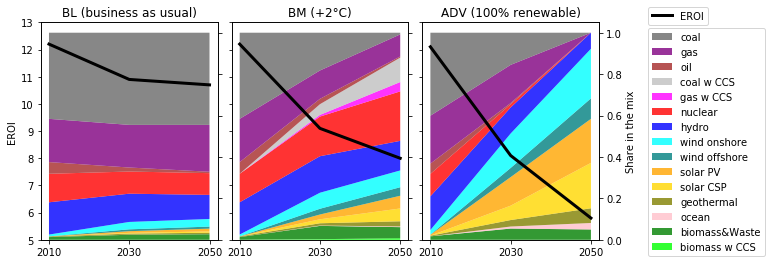

In [5]:
EROIs_mixes = results(themis, scenarios = scenarios+scenarios_dlr, to_plot=True)
# f, axarr = plt.subplots(2, sharex=True)
# axarr[0].plot(x, y)
# axarr[0].set_title('Sharing X axis')
# axarr[1].scatter(x, y)
if 'total' in EROIs_mixes.index: tot_name = 'total'
else: tot_name = 'Total (PWh/a)'
EROIs_mixes = EROIs_mixes.loc[['biomass w CCS', 'biomass&Waste', 'ocean', 'geothermal','solar CSP','solar PV','wind offshore',\
                               'wind onshore','hydro','nuclear', 'gas w CCS', 'coal w CCS', 'oil', 'gas', 'coal', tot_name]]
InteractiveShell.ast_node_interactivity = 'last'
colors = ['lime', 'green', 'pink', 'olive', 'gold', 'orange', 'teal', 'aqua', 'b', 'r', 'magenta', 'silver', 'brown', 'purple', 'dimgrey']
fig = plt.figure(figsize=(10,4)) # 7,5
_ = ylims = [5, 13] # 5, 10; 13, 18

ax1 = fig.add_subplot(1, 3, 1)
_ = ax1.plot(years, EROIs_mixes[[('BL', year, 'EROI') for year in years]].loc[tot_name], \
        label='EROI', color='black', zorder=20, linewidth=3)
_ = ax1.set_ylabel('EROI')
_ = ax1.set_ylim(ylims)
# ax.set_zorder(1)
_ = ax12 = ax1.twinx()
_ = ax12.stackplot(years, EROIs_mixes.fillna(0)[[('BL', year, 'mix') for year in years]].iloc[:15], \
              labels=EROIs_mixes.index[:15], colors=colors, alpha = 0.8, zorder=1)
_ = ax1.set_title('BL (business as usual)')
_ = xticks(years)
handles, labels = ax12.get_legend_handles_labels()
_ = ax1.set_zorder(ax12.get_zorder()+1)
_ = ax1.patch.set_visible(False)
# ax12.get_yaxis().set_visible(False)
_ = ax12.tick_params(labelright=False)

ax2 = fig.add_subplot(132)
_ = ax2.plot(years, EROIs_mixes[[('BM', year, 'EROI') for year in years]].loc[tot_name], \
        label='EROI', color='black', zorder=20, linewidth=3)
# ax2.set_ylabel('EROI')
_ = ax2.set_ylim(ylims)
# ax.set_zorder(1)
ax22 = ax2.twinx()
_ = ax22.stackplot(years, EROIs_mixes.fillna(0)[[('BM', year, 'mix') for year in years]].iloc[:15], \
              labels=EROIs_mixes.index[:15], colors=colors, alpha = 0.8, zorder=1)
_ = ax2.set_title('BM (+2°C)')
_ = xticks(years)
handles, labels = ax22.get_legend_handles_labels()
_ = ax2.set_zorder(ax22.get_zorder()+1)
_ = ax2.patch.set_visible(False)
_ = ax2.tick_params(labelleft=False)
_ = ax22.tick_params(labelright=False)
# ax2.get_yaxis().set_visible(False)
# ax22.get_yaxis().set_visible(False)

ax3 = fig.add_subplot(133)
_ = ax3.plot(years, EROIs_mixes[[('ADV', year, 'EROI') for year in years]].loc[tot_name], \
        label='EROI', color='black', zorder=20, linewidth=3)
# ax3.set_ylabel('EROI')
_ = ax3.set_ylim(ylims)
# ax.set_zorder(1)
ax32 = ax3.twinx()
_ = ax32.stackplot(years, EROIs_mixes.replace('–',0).fillna(0)[[('ADV', year, 'mix') for year in years]].iloc[:15], \
              labels=EROIs_mixes.index[:15], colors=colors, alpha = 0.8, zorder=1)
_ = ax3.set_title('ADV (100% renewable)') # ER (+2°C wo CCS nor nuclear)
_ = plt.ylabel('Share in the mix')
_ = xticks(years)
handles, labels = ax32.get_legend_handles_labels()
_ = ax32.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.25,0.45)) # (1.1,0.5)
_ = ax3.legend(loc='center left', bbox_to_anchor=(1.25,1.03)) # (1.1,0.97)
_ = ax3.set_zorder(ax32.get_zorder()+1)
_ = ax3.patch.set_visible(False)
# ax3.get_yaxis().set_visible(False)
_ = ax3.tick_params(labelleft=False)
_ = plt.subplots_adjust(wspace=0.08, hspace=0.08)

# _ = fig.savefig('Evolution of EROIs IEA-ADV - factor 2-60.png', dpi=200, bbox_inches="tight")

As you can see, the system-wide EROI of the power sector decreases even more in a 100% renewable scenario, from 12.1 in 2010 to 5.8 in 2050. **This is quite worrying for the energy transition, because it means that a 100% renewable electricity system would be twice as less efficient as the current one**. 

**Adrien Fabre**, 2018  
[personal website](https://sites.google.com/view/adrien-fabre)  
adrien.fabre@psemail.eu

## References

### This work
* The [working paper](https://drive.google.com/file/d/13r89ST7UfQ9IykRvn550yoLBWAwOsCD9/view)
* The [presentation](https://drive.google.com/open?id=1NaHAZZbjRtzTKs7V0HWrNVXppZLtz9-N)

### Theory
* Input-Output Analysis: [wikipedia](https://en.wikipedia.org/wiki/Input%E2%80%93output_model), [Miller & Blair (2009)](http://gen.lib.rus.ec/book/index.php?md5=8803A190575D7587AA8112F76BB82070), [Eurostat](http://ec.europa.eu/eurostat/documents/3859598/5902113/KS-RA-07-013-EN.PDF/b0b3d71e-3930-4442-94be-70b36cea9b39?version=1.0)
* EROI: [King et al. (2010)](http://careyking.com/wp-content/uploads/2013/10/ASME-ES90414_EROIMethodology-Wind_2010_King.pdf), [Murhpy et al. (2011)](http://science-and-energy.org/wp-content/uploads/2016/03/Murphy-et-al-2011-Order-from-Chaos-EROI-Protocol.pdf)
* EROI is not intrinsic: [King (2014)](https://sci-hub.tw/https%3A//doi.org/10.1016/j.energy.2014.05.032)

### Estimations of EROI
* [Dale (2010)](https://ir.canterbury.ac.nz/bitstream/handle/10092/5156/Dale2011GlobalEnergyModelling-ABiophysicalApproach.pdf)
* [Weißbach et al. (2013)](https://sci-hub.tw/https%3A//www.sciencedirect.com/science/article/pii/S0360544213000492)
* [Hall et al. (2014)](https://sci-hub.tw/https%3A//www.sciencedirect.com/science/article/pii/S0301421513003856)

### Link between EROI and affluence
Some authors argue that the value of EROI is of primary concern ([Hall et al., 2009](http://dieoff.com/_Energy/WhatIsTheMinumEROI_energies-02-00025.pdf); [Lambert & Lambert, 2011](https://mahb.stanford.edu/wp-content/uploads/2014/03/sustainability_LambertLambert_2011.pdf); [Lambert et al., 2014](https://www.sciencedirect.com/science/article/pii/S0301421513006447); [Fizaine & Court, 2016](https://sci-hub.tw/https%3A//www.sciencedirect.com/science/article/pii/S0301421516302087)), as they draw a link between the system-wide EROI and affluence of a society. Here is how [Hall (2011)](https://www.mdpi.com/2071-1050/3/10/1773) summarizes the argument:
> Think of a society dependent upon one resource: its domestic oil. If the EROI for this oil was 1.1:1 then one could pump the oil out of the ground and look at it. If it were 1.2:1 you could also refine it and look at it, 1.3:1 also distribute it to where you want to use it but all you could do is look at it. Hall et al. 2008 examined the EROI required to actually run a truck and found that if the energy included was enough to build and maintain the truck and the roads and bridges required to use it (i.e., depreciation), one would need at least a 3:1. Now if you wanted to put something in the truck, say some grain, and deliver it that would require an EROI of, say, 5:1 to grow the grain. If you wanted to include depreciation on the oil field worker, the refinery worker, the truck driver and the farmer you would need an EROI of say 7 or 8:1 to support the families. If the children were to be educated you would need perhaps 9 or 10:1, have health care 12:1, have arts in their life maybe 14:1 and so on. [Hall (2011)](https://www.mdpi.com/2071-1050/3/10/1773)

The reasoning of Hall relies on the observation that all sectors of the economy require energy, and that the more efficient is the energy production (i.e. the higher is the EROI), the more energy is available to the rest of the economy. In strict logic, Hall's argument relies on two questionable assumptions: that factors of production (and especially the labor force) are used at their full capacity, and that technical and organizational progress will not be sufficient to sustain current level of prosperity with significantly less labor (or other factors of production in limited supply). If one rejects these assumptions, one can imagine a sustained level of prosperity with a lower system-wide EROI, provided that a higher share of factors of production be devoted to the energy sector: for example, unemployed people could be mobilized to sustain the energy surplus available to the rest of society. In parallel to a shift in the labor force, [Raugei (2019)](https://www.nature.com/articles/s41560-019-0327-0) explains that an increased efficiency of energy use may also counteract the decrease in energy services implied by a declining EROI. That being said, given that current system-wide EROI is already declining due to the decline in fossil fuels quality ([Dale 2011](http://www.sciencedirect.com/science/article/pii/S0301421511006185), [Poisson, 2013](https://www.mdpi.com/1996-1073/6/11/5940), [Court & Fizaine, 2017](http://www.sciencedirect.com/science/article/pii/S0921800915303815)) and that technical progress is incremental, the aforementioned analyses should not be neglected. Under the current system of production, which will persist in the short term, EROI should not decrease too much for prosperous standards of living to be sustained.  


### Data
* [Exiobase](https://www.exiobase.eu/)
* [THEMIS](https://sci-hub.tw/https%3A//pubs.acs.org/doi/abs/10.1021/acs.est.5b01558) Thank you a lot Thomas Gibon for providing me the code and helping me!
* [IEA scenarios](http://gen.lib.rus.ec/book/index.php?md5=4D5AF94A02A48B799CF77641509C1C6B)
* [Energy [R]evolution](https://www.greenpeace.org/archive-international/Global/international/publications/climate/2015/Energy-Revolution-2015-Full.pdf) (commanded and funded by Greenpeace, realised by a team of the DLR using their model [REMix](https://www.dlr.de/tt/en/desktopdefault.aspx/tabid-2885/4422_read-12423/))
* [Cecilia 2050](https://cecilia2050.eu/publications/168)

## Appendix

For the sake of curiosity, here are the EROIs in all available input-output tables from THEMIS and Greenpeace:

EROIs and mix for Greenpeace scenarios:

In [6]:
results(themis, scenarios=['REF', 'ER', 'ADV'], longnames=True)

scenario      Reference DLR ('REF')                                   \
year                           2010         2030         2050          
stat                           EROI    mix  EROI    mix  EROI    mix   
biomass w CCS                     –   0.00     –   0.00     –   0.00   
biomass&Waste                   8.5   0.02   6.4   0.03   5.0   0.03   
ocean                           4.7   0.00   2.0   0.00   2.5   0.00   
geothermal                      5.6   0.00   3.8   0.01   2.5   0.01   
solar CSP                      35.5   0.00   9.3   0.00   8.0   0.01   
solar PV                       13.7   0.00   7.0   0.02   5.3   0.02   
wind offshore                   9.1   0.00   8.6   0.01   7.8   0.01   
wind onshore                    9.7   0.02   9.1   0.05   7.2   0.05   
hydro                          12.2   0.16  11.4   0.14  11.2   0.13   
nuclear                        12.2   0.11   7.3   0.10   7.1   0.08   
gas w CCS                         –   0.00     –   0.00     –   0.00   
coal w CCS                        –   0.00     –   0.00     –   0.00   
oil                             8.4   0.05  11.1   0.02  11.4   0.01   
gas                            14.9   0.23  15.3   0.23  15.6   0.25   
coal                           11.8   0.40  11.3   0.40  11.3   0.39   
Total (PWh/a)                  12.1  22.60  10.7  36.26  10.1  50.11   

scenario      Energy [R]evolution ('ER', +2°C, no CCS nor nuclear)         \
year                                                          2030          
stat                                                          EROI    mix   
biomass w CCS                                                  –     0.00   
biomass&Waste                                                5.3     0.06   
ocean                                                        4.3     0.01   
geothermal                                                   3.6     0.03   
solar CSP                                                    8.5     0.05   
solar PV                                                     5.6     0.11   
wind offshore                                                5.6     0.03   
wind onshore                                                 7.2     0.15   
hydro                                                       11.0     0.14   
nuclear                                                      8.3     0.02   
gas w CCS                                                      –     0.00   
coal w CCS                                                     –     0.00   
oil                                                         10.0     0.01   
gas                                                         16.6     0.21   
coal                                                        10.7     0.19   
Total (PWh/a)                                                8.4    33.60   

scenario                   Advanced ER ('ADV', 100% renewable)               \
year           2050                                       2030         2050   
stat           EROI    mix                                EROI    mix  EROI   
biomass w CCS     –   0.00                                   –   0.00     –   
biomass&Waste   4.7   0.06                                 5.2   0.05   4.6   
ocean           4.5   0.03                                 4.8   0.01   4.9   
geothermal      3.7   0.07                                 3.8   0.03   3.9   
solar CSP       7.7   0.17                                 9.3   0.07   7.8   
solar PV        4.4   0.20                                 5.4   0.14   4.7   
wind offshore   5.9   0.08                                 6.5   0.04   6.4   
wind onshore    6.0   0.22                                 7.2   0.17   5.8   
hydro          11.1   0.10                                11.0   0.13  10.9   
nuclear           –   0.00                                 8.3   0.02     –   
gas w CCS         –   0.00                                   –   0.00     –   
coal w CCS        –   0.00                                   

And here are similar results for an older project of future IO tables, [Cecilia 2050](https://cecilia2050.eu/publications/168) :

In [ ]:
cecilia = pymrio.cecilia_parser('/var/www/FutureIOT/') # <--- PATH to modify

In [5]:
EROIs_cecilia = pd.DataFrame()
EROIs_mixes_cecilia = pd.DataFrame()
steps = [-1, 0, 1, '2a', '2b', 3]
for step in steps:
    eroi_s = cecilia[step].erois()
    EROIs_cecilia[step] = eroi_s
    eroi_s = eroi_s.rename(index={'Power sector': 'total'})
    cecilia[step].elec_supply = dict()
    cecilia[step].elec_mix = dict()
    cecilia[step].elec_mix['total'] = 1
    cecilia[step].elec_supply['total'] = cecilia[step].impacts('Total Energy supply', secs = cecilia[step].energy_sectors('electricities')).sum()
    for sec in cecilia[step].energy_sectors('electricities'):
        cecilia[step].elec_supply[sec] = cecilia[step].impacts('Total Energy supply', secs = sec).sum()
        cecilia[step].elec_mix[sec[15:]] = round(cecilia[step].elec_supply[sec]/cecilia[step].elec_supply['total'],2)
    cecilia[step].elec_mix = pd.DataFrame(pd.Series(cecilia[step].elec_mix), columns=['mix'])
    EROIs_mixes_cecilia[[(step, 'EROI'), (step, 'mix')]] = pd.DataFrame(eroi_s).join(cecilia[step].elec_mix)
EROIs_cecilia = pd.DataFrame(EROIs_cecilia).rename(columns = {-1:'-1: original', 0:'0: balance', 1:'1: BAU', '2a':'2a: new mix', '2b':'2b: techno', 3:'3: 2°'})
# EROIs_cecilia
EROIs_mixes_cecilia = pd.DataFrame(EROIs_mixes_cecilia, columns = pd.MultiIndex.from_product([steps, ['EROI', 'mix']], names=['step', 'var']))
EROIs_mixes_cecilia.rename(columns = {-1:'-1: original', 0:'0: balanced', 1:'1: growth', '2a':'2a: new mix', '2b':'2b: new techno', 3:'3: 2° scenario'})

step    -1: original       0: balanced       1: growth       2a: new mix  \
var             EROI   mix        EROI   mix      EROI   mix        EROI   
wind             1.1  0.00         0.4  0.00       1.0  0.00        18.2   
hydro            5.1  0.14         3.5  0.13      12.9  0.19        12.7   
coal             8.1  0.46         5.7  0.46      13.8  0.48        11.0   
gas              9.1  0.20         6.6  0.19      19.7  0.17        24.9   
nuclear         11.6  0.20         9.1  0.22      24.4  0.16        15.7   
total            7.9  1.00         5.5  1.00      14.3  1.00        14.0   

step          2b: new techno       3: 2° scenario        
var       mix           EROI   mix           EROI   mix  
wind     0.04           19.1  0.04           18.3  0.04  
hydro    0.27           13.4  0.27           12.0  0.25  
coal     0.20           11.8  0.20           11.0  0.21  
gas      0.19           26.6  0.19           24.9  0.19  
nuclear  0.30           17.7  0.30           17.5  0.30  
total    1.00           15.2  1.00           14.4  1.00